**MNSIT** (Modified Nation Institute of Standards and Technology) is the most commonly used dataset for Digit recognition for Deep Learning because of its tens of thousands of handwritten images. it has total of 784 pixels each of 28 pixels in height and 28 pixels in width representing lightness or darkness of the picture


In [2]:
#installing the latest version of tensorflow
!pip install --upgrade tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 511.7 MB 6.3 kB/s 
     |████████████████████████████████| 438 kB 55.4 MB/s 
     |████████████████████████████████| 5.8 MB 20.8 MB/s 
     |████████████████████████████████| 1.6 MB 50.0 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.

In [3]:
# verify for the verion updated
!pip show tensorflow

Name: tensorflow
Version: 2.9.1
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.7/dist-packages
Requires: opt-einsum, google-pasta, tensorflow-io-gcs-filesystem, libclang, h5py, wrapt, tensorflow-estimator, typing-extensions, keras, grpcio, numpy, flatbuffers, packaging, absl-py, tensorboard, termcolor, six, protobuf, keras-preprocessing, astunparse, gast, setuptools
Required-by: kapre


**Importing, Normalizing and Defining the layers** 

In [4]:
# Importing the required libraries
import tensorflow as tf


# Import MNIST data
mnist = tf.keras.datasets.mnist

# Creating training and testing datasets
(x_train,y_train), (x_test,y_test) = mnist.load_data()

#Normalizing the datasets
x_train, x_test = tf.cast(x_train/255.0, tf.float32), tf.cast(x_test/255.0, tf.float32)
y_train, y_test = tf.cast(y_train, tf.int64), tf.cast(y_test, tf.int64)

# Defining a Sequential Model
model = tf.keras.models.Sequential()

#Defining layers of the model
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

11490434/11490434 [==============================] - 0s 0us/step


In [5]:
import numpy as np
np.max(x_train)

1.0

In [6]:
np.min(x_train)

0.0

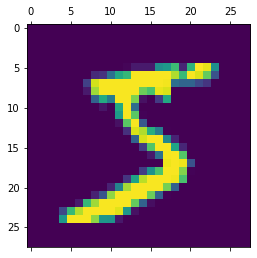

In [8]:
import matplotlib.pyplot as plt
plt.matshow(x_train[0])
plt.show()

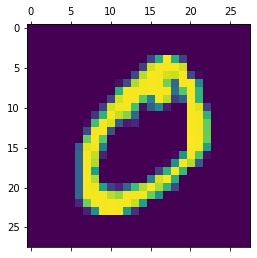

In [9]:
import matplotlib.pyplot as plt
plt.matshow(x_train[1])
plt.show()

In [10]:
y_train[:2]

<tf.Tensor: shape=(2,), dtype=int64, numpy=array([5, 0])>

In [11]:
x_train[0].shape

TensorShape([28, 28])

In [12]:
x_train.shape,x_test.shape

(TensorShape([60000, 28, 28]), TensorShape([10000, 28, 28]))

**Compiling the Model**

In [15]:
#Compiling the Model
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

**Training the Model**

In [16]:
#Training the Model
history = model.fit(x_train, y_train, batch_size=32, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.5980 - accuracy: 0.8437
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2794 - accuracy: 0.9201
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2276 - accuracy: 0.9350
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1934 - accuracy: 0.9449
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1683 - accuracy: 0.9517
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1487 - accuracy: 0.9578
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1331 - accuracy: 0.9622
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1199 - accuracy: 0.9664
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1092 - accuracy: 0.9694
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (32, 784)                 0         
                                                                 
 dense (Dense)               (32, 256)                 200960    
                                                                 
 dense_1 (Dense)             (32, 128)                 32896     
                                                                 
 dense_2 (Dense)             (32, 10)                  1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


**Evaluating the Model**

In [18]:
#Evaluating the Model
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1106 - accuracy: 0.9676


[0.11059072613716125, 0.9675999879837036]

**Predicting using the Model**

In [22]:
#Making Prediction using the Model
import numpy as np
x_new = x_test[:10]
y_pred = model.predict(x_new)
print(y_pred)
#np.array(class_names)[y_red]
y_new = y_test[:10]
y_new

1/1 [==============================] - 0s 28ms/step
[[1.5272662e-05 1.1678205e-07 1.0787090e-03 1.8477695e-03 1.3556220e-07
  2.5827314e-06 3.3748443e-10 9.9701369e-01 4.6582941e-06 3.6765352e-05]
 [2.1617210e-05 1.0239796e-04 9.9636143e-01 3.2389765e-03 2.2755737e-09
  2.1964886e-06 2.1126891e-04 1.5552029e-08 6.2123676e-05 3.0487254e-10]
 [1.5167456e-05 9.9133235e-01 1.7276459e-03 5.9383130e-04 4.7371842e-04
  4.2693756e-04 5.8258220e-04 3.1066649e-03 1.6615265e-03 7.9618192e-05]
 [9.9965501e-01 6.5411108e-08 1.9271004e-04 1.5790229e-06 4.8678510e-07
  1.3937021e-06 5.9639769e-05 6.1837665e-05 6.7198766e-07 2.6579923e-05]
 [5.6888857e-05 1.6898809e-06 2.8022219e-04 1.8002092e-06 9.8899281e-01
  5.0283830e-05 1.6741308e-04 7.3076319e-04 3.0661533e-05 9.6873892e-03]
 [1.1716832e-06 9.9602246e-01 2.1183852e-04 1.6662618e-04 5.5869925e-05
  8.2450442e-06 7.3565834e-06 3.2705707e-03 2.1335750e-04 4.2658801e-05]
 [1.4339504e-06 4.5339712e-06 8.2781098e-06 1.4296990e-05 9.9057543e-01
  5.26

<tf.Tensor: shape=(10,), dtype=int64, numpy=array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])>

**Ploting Accuracy and Loss** 

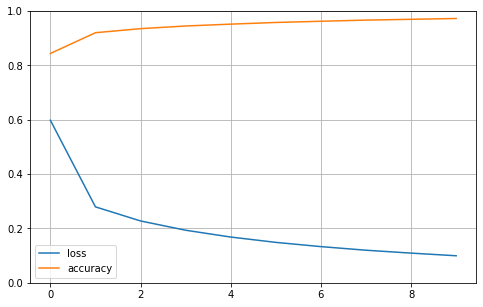

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()